# Installing Dependencies

In [1]:
# Install specific libraries
! pip install transformers
! pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.5/483.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!python --version
!python -c "import transformers; print(transformers.__version__)"
!python -c "import pycaret; print(pycaret.__version__)"
!python -c "import torch; print(torch.__version__)"
!python -c "import pandas; print(pandas.__version__)"
!python -c "import numpy; print(numpy.__version__)"
!python -c "import matplotlib; print(matplotlib.__version__)"
!python -c "import nltk; print(nltk.__version__)"

Python 3.10.11
4.29.2
3.0.1
2.0.0+cu118
1.5.3
1.23.5
3.7.1
3.8.1


# Packages

In [3]:
import numpy as np
import pandas as pd
import pycaret
import transformers
from transformers import AutoModel, BertTokenizerFast
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
import torch
import torch.nn as nn
# specify GPU
device = torch.device("cuda")

# Reading Data

In [4]:
# Mount Google Drive - applicable, if working on Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

data = pd.read_csv("/content/drive/MyDrive/Amazon_Products.csv")

data.dropna(subset=['Body'], inplace=True)
data.dropna(subset=['Title'], inplace=True)

data.head(5)

,ASIN,Product,Title,Rating,Date,Body,Brand
0,B0741D7LRD,"Princess 182050 Digital air Fryer, Black",Great product,5,22 February 2020,This is a brilliant product...I'd had the Tefa...,Princess
1,B0741D7LRD,"Princess 182050 Digital air Fryer, Black","I love mine, pity the non stick coating comes ...",1,25 June 2019,"I love mine, pity the non stick coating comes ...",Princess
2,B0741D7LRD,"Princess 182050 Digital air Fryer, Black",Digital programming broke down,1,21 March 2019,Thought this product would be great but had it...,Princess
3,B00P0V5IYW,"Smartwares RM370 , Carbon Monoxide Alarm, 1 Ye...",Perfect,5,4 July 2022,This is my second one of these the 1st lasted ...,Smartwares
4,B00P0V5IYW,"Smartwares RM370 , Carbon Monoxide Alarm, 1 Ye...",Great item,5,22 February 2022,Great item,Smartwares


In [6]:
data['Sentiment'] = data['Rating'].apply(lambda x: 'positive' if x >=3  else 'negative')
data['label'] = data['Sentiment'].apply(lambda x: 1 if x=="positive" else 0)
data['Text'] = data['Body'] + data['Title']
data['id'] = np.arange(data.shape[0])
#data.head(5)
data

,ASIN,Product,Title,Rating,Date,Body,Brand,Sentiment,label,Text,id
0,B0741D7LRD,"Princess 182050 Digital air Fryer, Black",Great product,5,22 February 2020,This is a brilliant product...I'd had the Tefa...,Princess,positive,1,This is a brilliant product...I'd had the Tefa...,0
1,B0741D7LRD,"Princess 182050 Digital air Fryer, Black","I love mine, pity the non stick coating comes ...",1,25 June 2019,"I love mine, pity the non stick coating comes ...",Princess,negative,0,"I love mine, pity the non stick coating comes ...",1
2,B0741D7LRD,"Princess 182050 Digital air Fryer, Black",Digital programming broke down,1,21 March 2019,Thought this product would be great but had it...,Princess,negative,0,Thought this product would be great but had it...,2
3,B00P0V5IYW,"Smartwares RM370 , Carbon Monoxide Alarm, 1 Ye...",Perfect,5,4 July 2022,This is my second one of these the 1st lasted ...,Smartwares,positive,1,This is my second one of these the 1st lasted ...,3
4,B00P0V5IYW,"Smartwares RM370 , Carbon Monoxide Alarm, 1 Ye...",Great item,5,22 February 2022,Great item,Smartwares,positive,1,Great itemGreat item,4
...,...,...,...,...,...,...,...,...,...,...,...
12122,B07D7R5M1R,Byron BY216 Wireless Doorbell with Plug-in Chi...,Door bell,5,6 November 2020,Good value,Byron,positive,1,Good valueDoor bell,12113
12123,B07D7R5M1R,Byron BY216 Wireless Doorbell with Plug-in Chi...,Very poor quality,1,3 October 2020,"Terrible sounds, some ring tones not working, ...",Byron,negative,0,"Terrible sounds, some ring tones not working, ...",12114
12124,B07D7R5M1R,Byron BY216 Wireless Doorbell with Plug-in Chi...,"Quality, Price.",5,12 June 2020,I Bought This For Myself As Needed A New One.P...,Byron,positive,1,I Bought This For Myself As Needed A New One.P...,12115
12125,B07D7R5M1R,Byron BY216 Wireless Doorbell with Plug-in Chi...,Terrible range and low volume,1,18 September 2019,"Perhaps I received a faulty unit, but on mine ...",Byron,negative,0,"Perhaps I received a faulty unit, but on mine ...",12116


<Axes: xlabel='Sentiment', ylabel='count'>

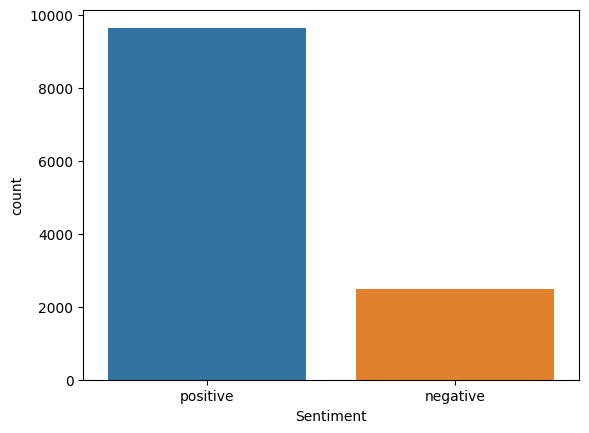

In [7]:
#distribution of positive / negative sentiments in dataset

import seaborn as sns
sns.countplot(x='Sentiment', data=data)

In [8]:
data.groupby('label').count()

,ASIN,Product,Title,Rating,Date,Body,Brand,Sentiment,Text,id
label,,,,,,,,,,
0,2473,2473,2473,2473,2473,2473,2473,2473,2473,2473
1,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645


# Pre-processing

In [9]:
import nltk
import re
nltk.download('stopwords')

from nltk.corpus import stopwords

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

    return TAG_RE.sub('', text)

def preprocess_text(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove Stopwords
    #pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    #sentence = pattern.sub('', sentence)

    return sentence


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
# Calling preprocessing_text function on ratings

X = []
sentences = list(data['Text'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [11]:
y = data['Sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

([<matplotlib.patches.Wedge at 0x7fa4674c3ca0>,
 [Text(-0.7177173957648095, -0.961707720576569, 'positive'),
  Text(0.717717440785597, 0.9617076869777913, 'negative')],
 [Text(-0.41866848086280556, -0.5609961703363319, '79.6%'),
  Text(0.41866850712493153, 0.5609961507370449, '20.4%')])

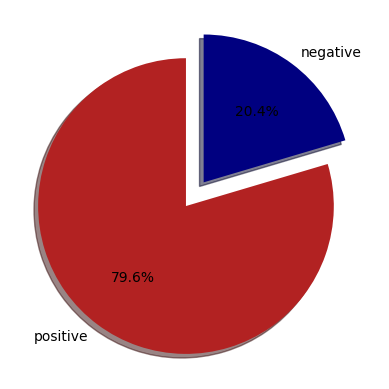

In [12]:
label_size = [data['label'].sum(),len(data['label'])-data['label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['positive','negative'],autopct='%1.1f%%')

In [13]:
# Train-Validation-Test set split into 70:15:15 ratio
# Train-Temp split
train_text, temp_text, train_labels, temp_labels = train_test_split(data['Text'], data['label'], 
                                                                    random_state=121, 
                                                                    test_size=0.3, 
                                                                    stratify=data['Sentiment'])
# Validation-Test split
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=121, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

# BERT Fine-tuning

code taken from source https://skimai.com/fine-tuning-bert-for-sentiment-analysis/

Reference section: D - Fine-tuning BERT

In [14]:
# Load BERT model and tokenizer via HuggingFace Transformers
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Text(0.5, 0, 'Token count')

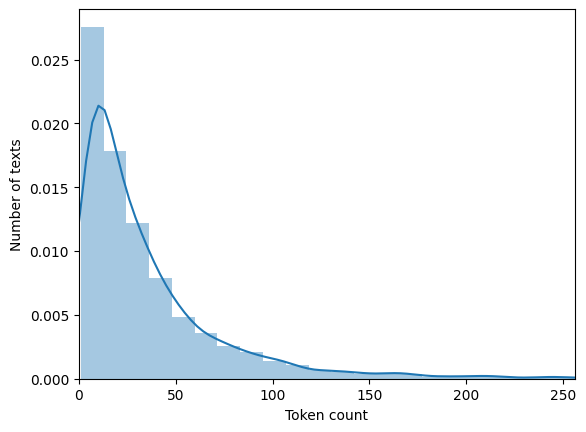

In [15]:
# Plot histogram of the number of words in train data 'title'
seq_len = [len(title.split()) for title in train_text]

#pd.Series(seq_len).hist(bins = 50)
sns.distplot(seq_len)
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')
plt.xlim([0, 256]);
plt.xlabel('Token count')


In [16]:
# BERT Tokeizer Functionality
sample_data = ["Build sentiment model.", 
               "Using bert."]                                         # sample data
tokenized_sample_data = tokenizer.batch_encode_plus(sample_data,
                                                    padding=True)     # encode text
print(tokenized_sample_data)

# Ref: https://huggingface.co/docs/transformers/preprocessing

{'input_ids': [[101, 3857, 15792, 2944, 1012, 102], [101, 2478, 14324, 1012, 102, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0]]}


In [17]:
# Majority of titles above have word length under 200. 
MAX_LENGHT = 200
# Tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

In [18]:
# Convert lists to tensors
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [19]:
# Data Loader structure definition
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 64                                             #define a batch size  changed from 10

train_data = TensorDataset(train_seq, train_mask, train_y)    # wrap tensors
train_sampler = RandomSampler(train_data)                     # sampler for sampling the data during training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
                                                              # dataLoader for train set
val_data = TensorDataset(val_seq, val_mask, val_y)            # wrap tensors
val_sampler = SequentialSampler(val_data)                     # sampler for sampling the data during training
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)
                                                              # dataLoader for validation set

In [22]:
# Freezing the parameters and defining trainable BERT structure
#for param in bert.parameters():
#    param.requires_grad = False    # false here means gradient need not be computed

In [20]:
class BertClassifier(nn.Module):
    def __init__(self, bert):  
      super(BertClassifier, self).__init__()
      self.bert = bert   
      self.dropout = nn.Dropout(0.1)            # dropout layer
      self.relu =  nn.ReLU()                    # relu activation function
      self.fc1 = nn.Linear(768,512)             # dense layer 1
      self.fc2 = nn.Linear(512,2)               # dense layer 2 (Output layer)
      self.softmax = nn.LogSoftmax(dim=1)       # softmax activation function
    def forward(self, sent_id, mask):           # define the forward pass  
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
                                                # pass the inputs to the model
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)                           # output layer
      x = self.softmax(x)                       # apply softmax activation
      return x

model = BertClassifier(bert)
# Defining the hyperparameters (optimizer, weights of the classes and the epochs)
# Define the optimizer
from transformers import AdamW
optimizer = AdamW(model.parameters(),lr = 5e-5)          # learning rate, changed from 1e-5,5e-5
# Define the loss function
cross_entropy  = nn.NLLLoss() 
# Number of training epochs
epochs = 4

# Class weights
class_weights = {0: 2.45, 1: 0.62}

In [21]:
# Defining training and evaluation functions
def train():  
  model.train()
  total_loss, total_accuracy = 0, 0
  
  for step,batch in enumerate(train_dataloader):                # iterate over batches
    if step % 50 == 0 and not step == 0:                        # progress update after every 50 batches.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]                                  # push the batch to gpu
    sent_id, mask, labels = batch 
    model.zero_grad()                                           # clear previously calculated gradients
    preds = model(sent_id, mask)                                # get model predictions for current batch
    loss = cross_entropy(preds, labels)                         # compute loss between actual & predicted values
    total_loss = total_loss + loss.item()                       # add on to the total loss
    loss.backward()                                             # backward pass to calculate the gradients
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)     # clip gradients to 1.0. It helps in preventing exploding gradient problem
    optimizer.step()                                            # update parameters
    class_weights                                               # update class weights
    preds=preds.detach().cpu().numpy()                          # model predictions are stored on GPU. So, push it to CPU

  avg_loss = total_loss / len(train_dataloader)                 # compute training loss of the epoch  
                                                                # reshape predictions in form of (# samples, # classes)
  return avg_loss                                 # returns the loss and predictions

def evaluate():  
  print("\nEvaluating...")  
  model.eval()                                    # Deactivate dropout layers
  total_loss, total_accuracy = 0, 0  
  for step,batch in enumerate(val_dataloader):    # Iterate over batches  
    if step % 50 == 0 and not step == 0:          # Progress update every 50 batches.     
                                                  # Calculate elapsed time in minutes.
                                                  # Elapsed = format_time(time.time() - t0)
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
                                                  # Report progress
    batch = [t for t in batch]                    # Push the batch to GPU
    sent_id, mask, labels = batch
    with torch.no_grad():                         # Deactivate autograd
      preds = model(sent_id, mask)                # Model predictions
      loss = cross_entropy(preds,labels)          # Compute the validation loss between actual and predicted values
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
  avg_loss = total_loss / len(val_dataloader)         # compute the validation loss of the epoch
  return avg_loss

In [22]:
# Train and predict
best_valid_loss = float('inf')
train_losses=[]                   # empty lists to store training and validation loss of each epoch
valid_losses=[]

for epoch in range(epochs):     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))     
    train_loss = train()                       # train model
    valid_loss = evaluate()                    # evaluate model
    if valid_loss < best_valid_loss :              # save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'Bert_new_model_weights_h3_1.pt')
    train_losses.append(train_loss)               # append training and validation loss
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 4
  Batch    50  of    133.
  Batch   100  of    133.

Evaluating...

Training Loss: 0.213
Validation Loss: 0.149

 Epoch 2 / 4
  Batch    50  of    133.
  Batch   100  of    133.

Evaluating...

Training Loss: 0.072
Validation Loss: 0.110

 Epoch 3 / 4
  Batch    50  of    133.
  Batch   100  of    133.

Evaluating...

Training Loss: 0.033
Validation Loss: 0.084

 Epoch 4 / 4
  Batch    50  of    133.
  Batch   100  of    133.

Evaluating...

Training Loss: 0.014
Validation Loss: 0.107


# Saving the model in the drive


In [34]:
cp '/content/Bert_new_model_weights_h3_1.pt' '/content/drive/MyDrive/Bert_new_model_weights_h3_1.pt'

# loading weights of best model

In [22]:
# load weights of best model
path = '/content/drive/MyDrive/Bert_new_model_weights_h3_1.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

# Performance

In [24]:
#h3_1
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)

acc = accuracy_score(test_y, preds)

print(classification_report(test_y, preds, target_names=['Negative', 'Positive']))

print('test_accuracy: %.3f' % (acc))


              precision    recall  f1-score   support

    Negative       0.92      0.96      0.94       371
    Positive       0.99      0.98      0.98      1447

    accuracy                           0.98      1818
   macro avg       0.96      0.97      0.96      1818
weighted avg       0.98      0.98      0.98      1818

test_accuracy: 0.976


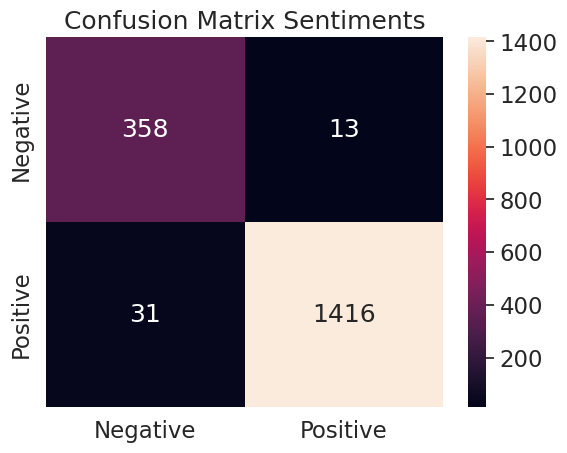

In [25]:
C_M = confusion_matrix(test_y, preds)

# Define labels
labels = {0: "Negative", 1: "Positive"}

# Plot confusion matrix
sns.set(font_scale=1.5)
ax = sns.heatmap(C_M, annot=True, fmt="d", xticklabels=labels.values(), yticklabels=labels.values())
ax.set_title("Confusion Matrix Sentiments")
plt.show()

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score,balanced_accuracy_score,confusion_matrix

Accuracy_BERT = accuracy_score(test_y, preds)
Balanced_accuracy_BERT = balanced_accuracy_score(test_y, preds)
Precision_BERT = precision_score(test_y, preds,average = 'weighted')
Recall_BERT = recall_score(test_y, preds,average = 'weighted')
F1_score_BERT = f1_score(test_y, preds,average = 'weighted') #, average='macro'
sensitivity_BERT = Recall_BERT
specificity_BERT =  C_M[0][0] / (C_M[0][0] + C_M[0][1])
 
print(Accuracy_BERT)
print(Balanced_accuracy_BERT)
print(Precision_BERT)
print(Recall_BERT)
print(F1_score_BERT)
print(sensitivity_BERT)
print(specificity_BERT) 


0.9757975797579758
0.9717679668130177
0.9764965326875872
0.9757975797579758
0.9760084496115229
0.9757975797579758
0.9649595687331537


In [ ]:
C_M = confusion_matrix(test_y, preds)

# Define labels
labels = {0: "Negative", 1: "Positive"}

# Plot confusion matrix
sns.set(font_scale=1.5)
ax = sns.heatmap(C_M, annot=True, fmt="d", xticklabels=labels.values(), yticklabels=labels.values())
ax.set_title("Confusion Matrix Sentiments")
plt.show()

#Testing BERT model on New Dataset

In [31]:
# Load sample Amazon reviews csv from kaggle (https://data.world/datafiniti/consumer-reviews-of-amazon-products)

sample_reviews = pd.read_csv("/content/drive/MyDrive/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")

sample_reviews['BERT_sentiment'] = pd.Series()

sample_reviews['review_title'] = sample_reviews['reviews.text']+sample_reviews['reviews.title']


Text(0.5, 0, 'Token count')

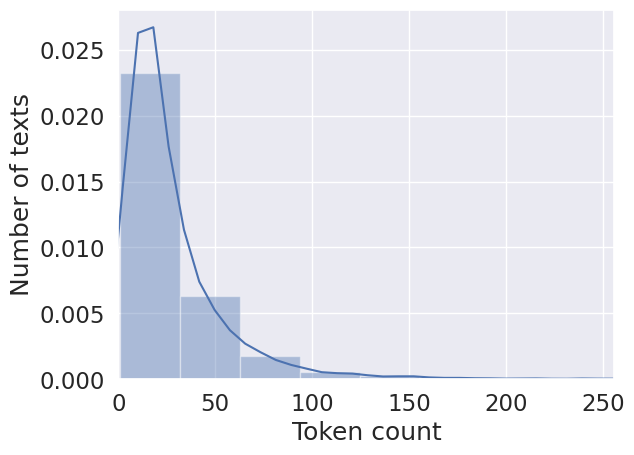

In [32]:
# Plot histogram of the number of words in train data 'title'
seq_len = [len(title.split()) for title in sample_reviews['review_title']]

#pd.Series(seq_len).hist(bins = 50)
sns.distplot(seq_len)
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')
plt.xlim([0, 256]);
plt.xlabel('Token count')


In [35]:
#30 mins execution time
initial = 0
gap = 4000

  
while initial < len(sample_reviews)+1: #Running BERT algorithm on a batch of 3000 records to avoid memory issues 
  end = initial + gap
  
  unseen_reviews = sample_reviews['review_title'][initial:end]

  unseen_processed = []
  for review in unseen_reviews:
    review = preprocess_text(review)
    unseen_processed.append(review)
  
  # tokenize and encode sequences in the test set
  MAX_LENGHT = 100 #As token count <= 100

  tokens_unseen = tokenizer.batch_encode_plus(
      unseen_processed,
      max_length = MAX_LENGHT,
      pad_to_max_length=True,
      truncation=True
  )

  unseen_seq = torch.tensor(tokens_unseen['input_ids'])
  unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

  with torch.no_grad():
    preds = model(unseen_seq, unseen_mask)
    preds = preds.detach().cpu().numpy()

  preds = np.argmax(preds, axis = 1)
  preds
  
  sample_reviews.loc[initial:end-1,'BERT_sentiment'] = preds #Predicting sentiment and updating df

  print(f"Rows {initial} - {end-1} affected")

  initial = end 

Rows 0 - 3999 affected
Rows 4000 - 7999 affected
Rows 8000 - 11999 affected
Rows 12000 - 15999 affected
Rows 16000 - 19999 affected
Rows 20000 - 23999 affected
Rows 24000 - 27999 affected
Rows 28000 - 31999 affected


In [36]:
sample_reviews['Amazon_rating'] = sample_reviews['reviews.rating'].apply(lambda x: 1 if x >=3  else 0)
sample_reviews['BERT_vs_actual'] = sample_reviews['Amazon_rating'] == sample_reviews['BERT_sentiment']

<Axes: >

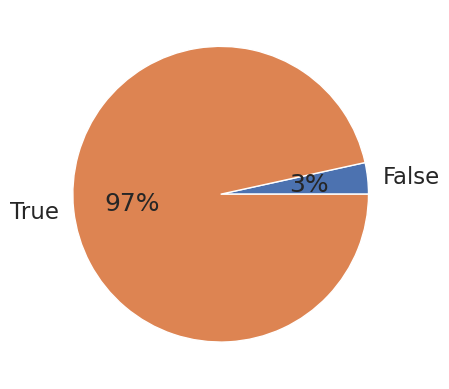

In [37]:
sample_reviews.groupby('BERT_vs_actual').size().plot(kind='pie', autopct='%1.0f%%')

In [45]:
print(classification_report(sample_reviews['Amazon_rating'], sample_reviews['BERT_sentiment'], target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.69      0.70      0.69      1581
    Positive       0.98      0.98      0.98     26751

    accuracy                           0.97     28332
   macro avg       0.84      0.84      0.84     28332
weighted avg       0.97      0.97      0.97     28332



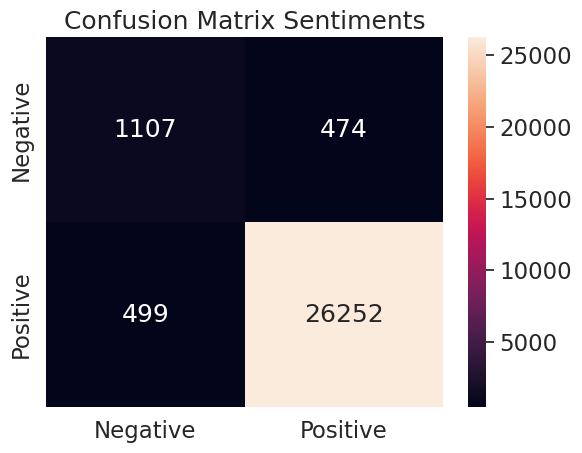

In [41]:
C_M = confusion_matrix(sample_reviews['Amazon_rating'], sample_reviews['BERT_sentiment'])

# Define labels
labels = {0: "Negative", 1: "Positive"}

# Plot confusion matrix
sns.set(font_scale=1.5)
ax = sns.heatmap(C_M, annot=True, fmt="d", xticklabels=labels.values(), yticklabels=labels.values())
ax.set_title("Confusion Matrix Sentiments")
plt.show()

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score,balanced_accuracy_score,confusion_matrix

Accuracy_BERT_newdata = accuracy_score(sample_reviews['Amazon_rating'], sample_reviews['BERT_sentiment'])
Balanced_accuracy_BERT_new_data = balanced_accuracy_score(sample_reviews['Amazon_rating'], sample_reviews['BERT_sentiment'])
Precision_BERT_newdata = precision_score(sample_reviews['Amazon_rating'], sample_reviews['BERT_sentiment'],average = 'weighted')
Recall_BERT_newdata = recall_score(sample_reviews['Amazon_rating'], sample_reviews['BERT_sentiment'],average = 'weighted')
F1_score_BERT_newdata = f1_score(sample_reviews['Amazon_rating'], sample_reviews['BERT_sentiment'],average = 'weighted') #, average='macro'
sensitivity_BERT_newdata = Recall_BERT_newdata
specificity_BERT_newdata =  C_M[0][0] / (C_M[0][0] + C_M[0][1])
 


In [44]:
print(Accuracy_BERT_newdata)
print(Balanced_accuracy_BERT_new_data)
print(Precision_BERT_newdata)
print(Recall_BERT_newdata)
print(F1_score_BERT_newdata)
print(sensitivity_BERT_newdata)
print(specificity_BERT_newdata)

0.9656572073979952
0.8407681225203094
0.9659157262986023
0.9656572073979952
0.9657838786772334
0.9656572073979952
0.7001897533206831


In [39]:
sample_reviews.to_csv('Amazon_Unseen_Predictions_BERT_v2.csv', sep=',', encoding='UTF-8')

In [40]:
cp './Amazon_Unseen_Predictions_BERT_v2.csv' '/content/drive/MyDrive'

In [ ]:
BERT_newdata = pd.read_csv("/content/drive/MyDrive/Amazon_Unseen_Predictions_BERT_v1.csv")

BERT_newdata.head(2)

,Unnamed: 0,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,BERT_sentiment,review_title,Amazon_rating,BERT_vs_actual
0,0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,...,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",0.0,I order 3 of them and one of the item is bad q...,1,False
1,1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,...,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",1.0,Bulk is always the less expensive way to go fo...,1,True


In [ ]:
BERT_newdata.head(2)

,Unnamed: 0,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,BERT_sentiment,review_title,Amazon_rating,BERT_vs_actual
0,0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,...,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",0.0,I order 3 of them and one of the item is bad q...,1,False
1,1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,...,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",1.0,Bulk is always the less expensive way to go fo...,1,True


In [ ]:
#selected_rows = df[(df['A'] == 1.0) & (df['B'] == 1)]

TP = BERT_newdata[(BERT_newdata['BERT_sentiment'] == 1.0) & (BERT_newdata['Amazon_rating'] == 1)]
TN = BERT_newdata[(BERT_newdata['BERT_sentiment'] == 0.0) & (BERT_newdata['Amazon_rating'] == 0)]
FP = BERT_newdata[(BERT_newdata['BERT_sentiment'] == 1.0) & (BERT_newdata['Amazon_rating'] == 0)]
FN = BERT_newdata[(BERT_newdata['BERT_sentiment'] == 0.0) & (BERT_newdata['Amazon_rating'] == 1)]




In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score,balanced_accuracy_score,confusion_matrix

accuracy_BERT_newdata = accuracy_score(BERT_newdata['Amazon_rating'], BERT_newdata['BERT_sentiment'])
Precision_BERT_newdata = precision_score(BERT_newdata['Amazon_rating'], BERT_newdata['BERT_sentiment'],average = 'weighted')
Recall_BERT_newdata = recall_score(BERT_newdata['Amazon_rating'], BERT_newdata['BERT_sentiment'],average = 'weighted')
F1_score_BERT_newdata = f1_score(BERT_newdata['Amazon_rating'], BERT_newdata['BERT_sentiment'],average = 'weighted') #, average='macro'
sensitivity_BERT_newdata = Recall_BERT_newdata
specificity_BERT_newdata =  TN.shape[0] / (TN.shape[0] + FP.shape[0])
 


In [ ]:
print(accuracy_BERT_newdata)
print(Precision_BERT_newdata)
print(Recall_BERT_newdata)
print(F1_score_BERT_newdata)
print(sensitivity_BERT_newdata)
print(specificity_BERT_newdata)

0.9469857405054356
0.9323796682192855
0.9469857405054356
0.930171443613654
0.9469857405054356
0.1283997469955724


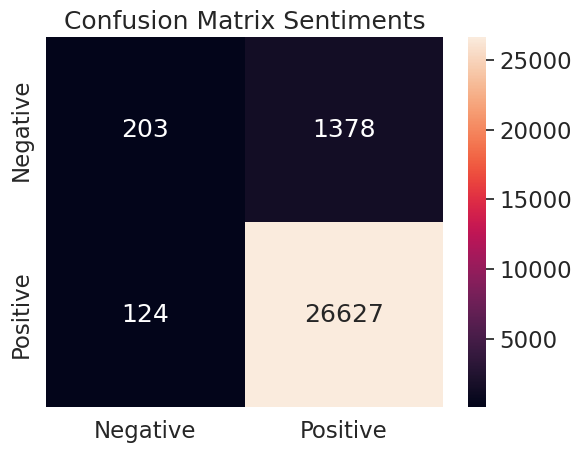

In [ ]:
C_M = confusion_matrix(BERT_newdata['Amazon_rating'], BERT_newdata['BERT_sentiment'])

# Define labels
labels = {0: "Negative", 1: "Positive"}

# Plot confusion matrix
sns.set(font_scale=1.5)
ax = sns.heatmap(C_M, annot=True, fmt="d", xticklabels=labels.values(), yticklabels=labels.values())
ax.set_title("Confusion Matrix Sentiments")
plt.show()